In [3]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, LSTM, GRU, Bidirectional, Embedding 
from tensorflow.keras import Model, Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, Concatenate, Conv3D
from tensorflow.keras.utils import plot_model

In [ ]:
def plot_it(model):
    return plot_model(model,
               show_shapes=True,
               show_dtype=True,
               show_layer_names=True)

In [12]:
max_english_len = 22
max_hindi_len = 32
english_vocab_size = 1000
hindi_vocab_size = 1200 + 1
latent_dim = 50

# Encoder
encoder_inputs = Input(shape=(None,))
encoder_embedding = Embedding(english_vocab_size, latent_dim)(encoder_inputs)
encoder = LSTM(latent_dim, return_state=True, return_sequences=True)
encoder_outputs, state_h, state_c = encoder(encoder_embedding)
encoder_states = [state_h, state_c]
print(encoder.output_shape)
# Decoder
decoder_inputs = Input(shape=(None,))
decoder_embedding = Embedding(hindi_vocab_size, latent_dim)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(hindi_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


[(None, None, 50), (None, 50), (None, 50)]
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, None)]               0         []                            
                                                                                                  
 input_12 (InputLayer)       [(None, None)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, None, 50)             50000     ['input_11[0][0]']            
                                                                                                  
 embedding_1 (Embedding)     (None, None, 50)             60050     ['input_12[0][0]']            
                                                 

In [13]:
print(encoder_outputs.shape)
print(state_h.shape)
print(state_c.shape)

(None, None, 50)
(None, 50)
(None, 50)


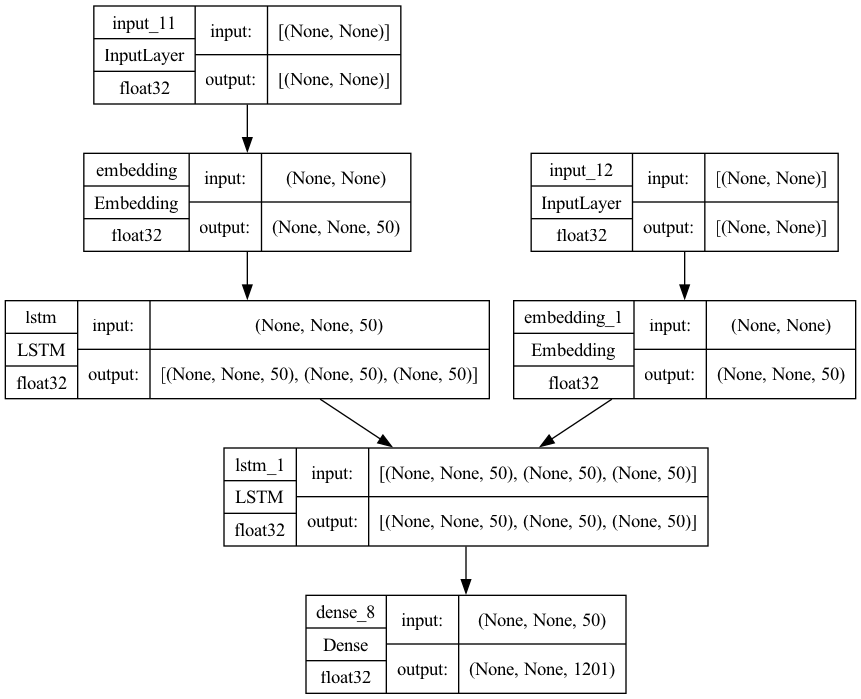

In [14]:
plot_it(model)

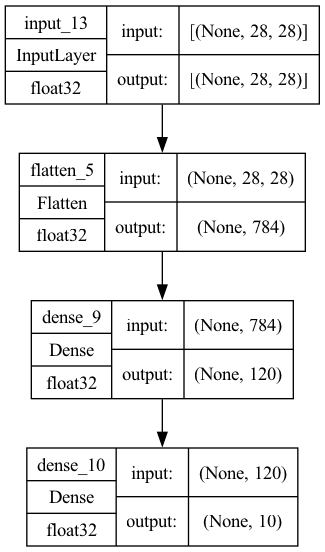

In [15]:
# Define the simple model 
model = Sequential(
    [Input(shape=(28,28)), # model fit will replace the batch size dimension
     Flatten(),
     Dense(120, activation='relu'),
     Dense(10, activation="softmax")])

plot_it(model)

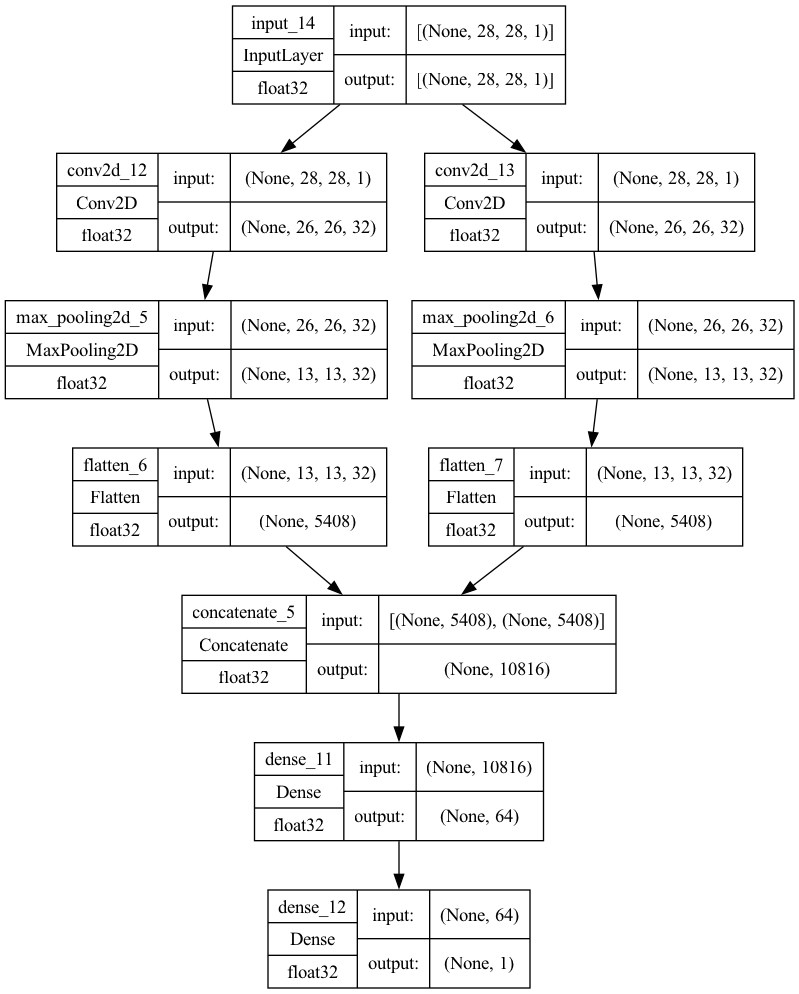

In [16]:
# shared layer model
input_layer = Input(shape=(28,28,1))
conv_1 = Conv2D(32, (3, 3), activation="relu")(input_layer)
conv_2 = Conv2D(32, (3, 3), activation="relu")(input_layer)

max_pool_conv1d = MaxPooling2D((2, 2))(conv_1)
max_pool_conv2d = MaxPooling2D((2, 2))(conv_2)

flatten_1 = Flatten()(max_pool_conv1d)
flatten_2 = Flatten()(max_pool_conv2d)

concatenate = Concatenate()([flatten_1, flatten_2])
dense_1 = Dense(64, activation="relu")(concatenate)
dense_2 = Dense(1, activation="sigmoid")(dense_1)

model = Model(inputs=input_layer, outputs=dense_2)
plot_it(model)


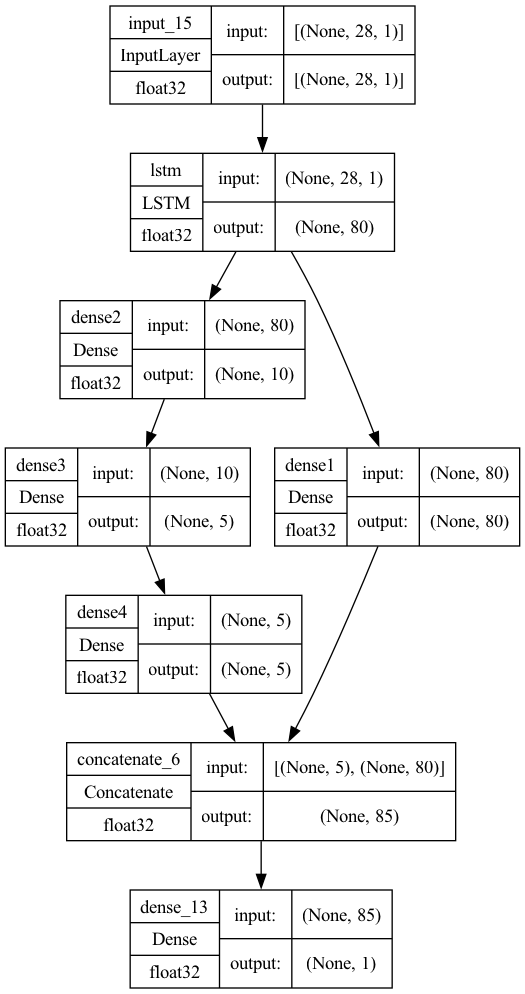

In [17]:
# Shared feature extraction model 
input_layer = Input(shape=(28,1))
lstm = LSTM(80, name="lstm")(input_layer)
dense_1 = Dense(80, activation="relu", name="dense1")(lstm)
dense_2 = Dense(10, activation="softmax", name="dense2")(lstm)
dense_3 = Dense(5, activation="sigmoid", name="dense3")(dense_2)
dense_4 = Dense(5, activation="sigmoid", name="dense4")(dense_3)
concatenate = Concatenate()([dense_4, dense_1])
output = Dense(1, activation="sigmoid")(concatenate)

model = Model(inputs=input_layer, outputs=output)
plot_it(model)


# define input
# visible = Input(shape=(100,1))
# # feature extraction
# extract1 = LSTM(10)(visible)
# # first interpretation model
# interp1 = Dense(10, activation='relu')(extract1)
# # second interpretation model
# interp11 = Dense(10, activation='relu')(extract1)
# interp12 = Dense(20, activation='relu')(interp11)
# interp13 = Dense(10, activation='relu')(interp12)
# # merge interpretation
# merge = concatenate([interp1, interp13])
# # output
# output = Dense(1, activation='sigmoid')(merge)
# model = Model(inputs=visible, outputs=output)

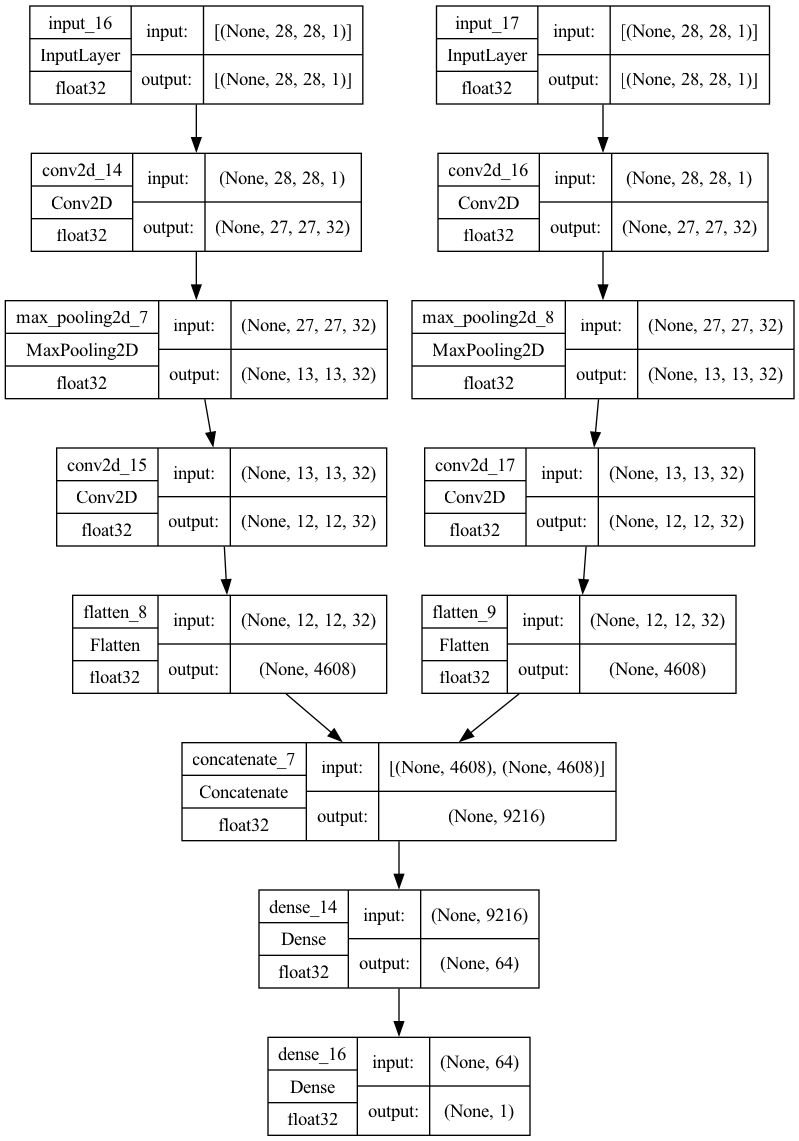

In [18]:
# Multiple inputs and 1 output
input_1 = Input(shape=(28,28,1))
conv_1 = Conv2D(32, (2,2), activation="relu")(input_1)
max_pool_1 = MaxPooling2D((2,2))(conv_1)
conv_12 = Conv2D(32, (2,2), activation="relu")(max_pool_1)
flatten_1 = Flatten()(conv_12)

input_2 = Input(shape=(28,28, 1))
conv_2 = Conv2D(32, (2,2), activation="relu")(input_2)
max_pool_2 = MaxPooling2D((2,2))(conv_2)
conv_22 = Conv2D(32, (2,2), activation="relu")(max_pool_2)
flatten_2 = Flatten()(conv_22)

concatenate = Concatenate()([flatten_1, flatten_2])
dense_1 = Dense(64, activation="relu")(concatenate)
dense_2 = Dense(64, activation="relu")(dense_2)
output = Dense(1, activation="sigmoid")(dense_1)


model = Model(inputs=[input_1, input_2], outputs=output)
plot_it(model)

What does the double bracket syntax do?

What does it mean?

It looks confusing, but it is not a special python thing, just one line doing two things.

The first bracket “(32)” creates the layer via the class constructor, the second bracket “(input)” is a function with no name implemented via the __call__() function, that when called will connect the layers.

The __call__() function is a default function on all Python objects that can be overridden and is used to “call” an instantiated object. Just like the __init__() function is a default function on all objects called just after instantiating an object to initialize it.

We can do the same thing in two lines:
dense1 = Dense(32)
# connect layer to previous layer
dense1(input)

or 
# create layer
dense1 = Dense(32)
# connect layer to previous layer
dense1.__call_(input)